In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import f_decline

In [3]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Do not forget to set the radius for centeral nodes calculation
# The minimum trip distance is considered 1000m and this can be modified through utils.py: generate_demand function. 
# long attribute should be calculated according to the size of city
# Platform fare is 2$ per km

params = MaaSSim.utils.get_config('glance.json')
params.vehicle_fixed_positions = True
params.times.patience = 600 #in second
params.dist_threshold = 10000 #in meter
params.dist_threshold_min = 1000
params.city = "Delft, Netherlands"
params.paths.G = "../../data/graphs/Delft.graphml"
params.paths.skim = "../../data/graphs/Delft.csv"

params.platforms.base_fare = 2
params.platforms.fare = 1.2 
params.platforms.min_fare = 2

params.nP = 50
params.nV = 20
params.simTime = 1

In [6]:
sim= MaaSSim.simulators.simulate(params=params)

17-04-22 15:15:53-WARNING-Setting up 1h simulation at 2022-04-17 14:48:17 for 20 vehicles and 50 passengers in Delft, Netherlands
17-04-22 15:15:53-INFO--------------------	Starting simulation	-------------------
17-04-22 15:15:53-INFO-pax    1  got to dest at                           2022-04-17 14:52:54
17-04-22 15:15:53-INFO-pax    2  got to dest at                           2022-04-17 14:53:40
17-04-22 15:15:53-INFO-pax    3  got to dest at                           2022-04-17 14:55:20
17-04-22 15:15:54-INFO-pax    6  got to dest at                           2022-04-17 15:00:59
17-04-22 15:15:54-INFO-pax    0  got to dest at                           2022-04-17 15:01:32
17-04-22 15:15:54-INFO-pax    5  got to dest at                           2022-04-17 15:01:44
17-04-22 15:15:54-INFO-pax    7  got to dest at                           2022-04-17 15:01:58
17-04-22 15:15:54-INFO-pax    4  got to dest at                           2022-04-17 15:02:07
17-04-22 15:15:54-INFO-pax    9  go

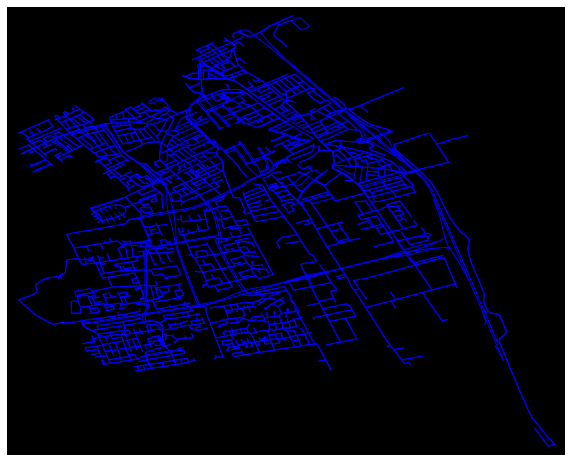

In [29]:
#No need to run

G = sim.inData.G
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=0, bgcolor='black', 
                        edge_color='b')

Number of centeral nodes:  0


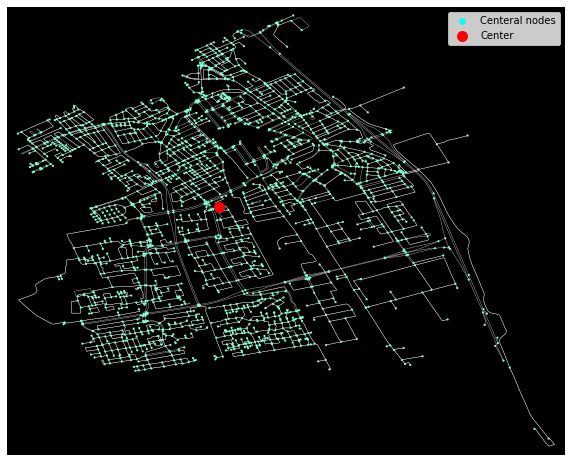

In [30]:
#No need to run
centeral_nodes = sim.inData.stats.central_nodes

l_x=[]
l_y=[]

for i in centeral_nodes:
    l_x.append(sim.inData.G.nodes[i]['x'])
    l_y.append(sim.inData.G.nodes[i]['y'])

print('Number of centeral nodes: ', len(l_x))

fig, ax = ox.plot_graph(sim.inData.G, figsize=(10, 10), node_size=5, edge_linewidth=0.3,
                            show=False, close=False, node_color='aquamarine',
                            edge_color='white', bgcolor='black')

scat = plt.scatter(x=l_x, y=l_y,c='aqua',linewidths=0.5, label='Centeral nodes')
#scat = plt.scatter(x=l_x, y=l_y,c='tab:red',linewidths=1)
scat = plt.scatter(x=sim.inData.G.nodes[sim.inData.stats.center]['x'], 
                   y=sim.inData.G.nodes[sim.inData.stats.center]['y'],c='red',linewidths=5,
                   label='Center')

plt.legend()

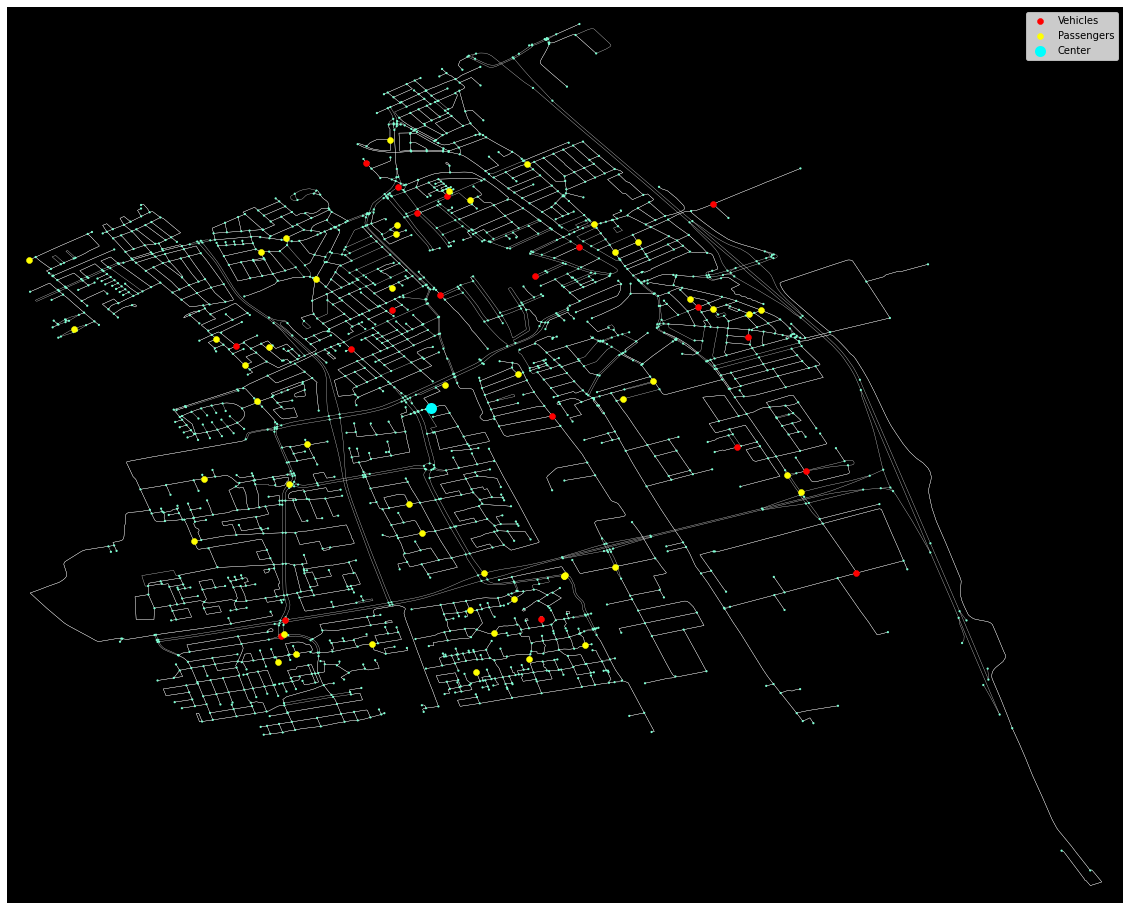

In [31]:
vehicles_position = sim.vehicle_fixed_positions
veh_lx=[]
veh_ly=[]
for i in vehicles_position:
    veh_lx.append(sim.inData.G.nodes[i]['x'])
    veh_ly.append(sim.inData.G.nodes[i]['y'])
    
passengers_position = sim.inData.passengers.pos
pass_lx=[]
pass_ly=[]
for i in passengers_position:
    pass_lx.append(sim.inData.G.nodes[i]['x'])
    pass_ly.append(sim.inData.G.nodes[i]['y'])

fig, ax = ox.plot_graph(sim.inData.G, figsize=(20, 20), node_size=5, edge_linewidth=0.3,
                            show=False, close=False, node_color='aquamarine',
                            edge_color='white', bgcolor='black')

scat = plt.scatter(x=veh_lx, y=veh_ly,c='red',linewidths=0.5, label='Vehicles')
scat = plt.scatter(x=pass_lx, y=pass_ly,c='yellow',linewidths=0.5, label='Passengers')
#scat = plt.scatter(x=l_x, y=l_y,c='tab:red',linewidths=1)
scat = plt.scatter(x=sim.inData.G.nodes[sim.inData.stats.center]['x'], 
                   y=sim.inData.G.nodes[sim.inData.stats.center]['y'],c='aqua',linewidths=5,
                   label='Center')

plt.legend()

In [9]:
sim.make_and_run(f_driver_decline=f_decline)

17-04-22 15:17:56-INFO--------------------	Starting simulation	-------------------
17-04-22 15:17:57-INFO-pax    1  got to dest at                           2022-04-17 14:52:54
17-04-22 15:17:57-INFO-pax    2  got to dest at                           2022-04-17 14:53:40
17-04-22 15:17:57-INFO-pax    3  got to dest at                           2022-04-17 14:55:20
17-04-22 15:17:57-INFO-pax    6  got to dest at                           2022-04-17 15:00:59
17-04-22 15:17:57-INFO-pax    0  got to dest at                           2022-04-17 15:01:32
17-04-22 15:17:57-INFO-pax    5  got to dest at                           2022-04-17 15:01:44
17-04-22 15:17:57-INFO-pax    7  got to dest at                           2022-04-17 15:01:58
17-04-22 15:17:57-INFO-pax    4  got to dest at                           2022-04-17 15:02:07
17-04-22 15:17:58-INFO-pax    9  got to dest at                           2022-04-17 15:04:07
17-04-22 15:17:58-INFO-pax   11  got to dest at                        